# assignment 2



In [48]:
import numpy as np
import matplotlib.pyplot as plt
import math   #  To compute the constant pi in Exercise 3

In [49]:
# Construct new Generator and fix seed for reproducability (here 12345).
rng = np.random.default_rng(12345)

In [50]:
# Decide on sample size
sample_size = 100000

In [51]:
# Sample from the uniform distribution on [0.0, 1.0).
myuniformsample = rng.random(size=sample_size)
print(np.mean(myuniformsample))

0.49907334079644716


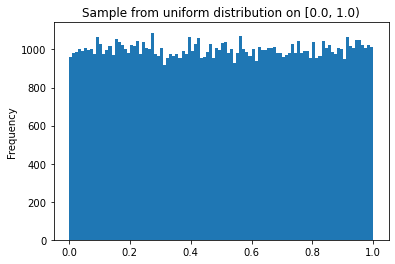

In [5]:
# Plot histogram of sample from uniform distribution on [0, 1).
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.hist(myuniformsample, bins=100)
ax.set_title("Sample from uniform distribution on [0.0, 1.0)")
ax.set_ylabel("Frequency")
plt.show()


## Programming tasks

### Exercise 1
Write Python code that 
1. generates a sample from the standard normal distribution and plots it in a histogram;   
2. generates a sample from the normal distribution with mean 3 and variance 4 and plots it in a histogram;
3. generates a sample from the exponential distribution with mean 2 and plots it in a histogram. 

 __Hint:__ https://numpy.org/doc/stable/reference/random/generator.html
 

 ### Solution - Exercise 1

We first write a function that receives two arguments: mysample is a numpay array containing a sample of random variables and name_distribution is a string providing the name of a probability distribution. The function will plot a histogram of the sample and write the name of the distribution in the title of the histogram. 

In [6]:
def plot_histogram(mysample, name_distribution):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.hist(mysample, bins=100)
    ax.set_title('Histogram of sample from {} distribution'.format(name_distribution))
    ax.set_ylabel("Frequency")
    plt.show()

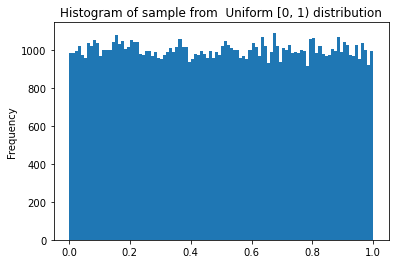

In [7]:
# Sampling from the uniform distribution on [0.0, 1.0):
myuniformsample = rng.random(size=sample_size)
# Plotting:
plot_histogram(myuniformsample, " Uniform [0, 1)")

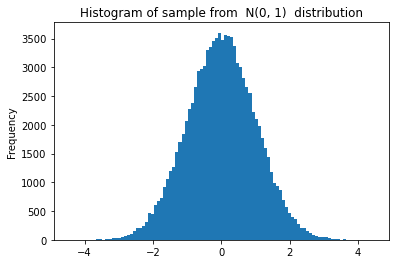

In [8]:
# Sampling from the standard normal distribution.
mystandardnormalsample = rng.standard_normal(size=sample_size)
# Plotting:
plot_histogram(mystandardnormalsample, " N(0, 1) ")

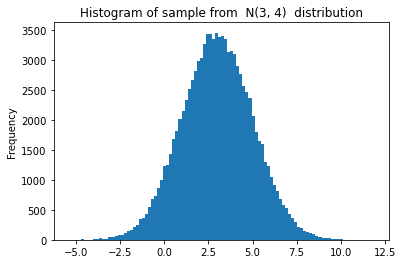

In [9]:
# Sampling from the non-standard normal distribution.
# Note that here loc refers to the mean and scale to the standard deviation.
mynormalsample = rng.normal(loc=3.0, scale=2.0, size=sample_size)
plot_histogram(mynormalsample, " N(3, 4) ")

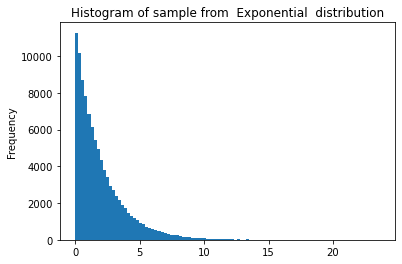

In [10]:
# Sampling from the exponential distribution.
# Note that scale corresponds to the mean here.
myexponentialsample = rng.exponential(scale=2.0, size=sample_size)
# Plotting:
plot_histogram(myexponentialsample, " Exponential ")

So far we have considered histograms that show frequencies. You can also use them to approximate a probability density funtion by setting density = True when you plot the histogram as follows: 


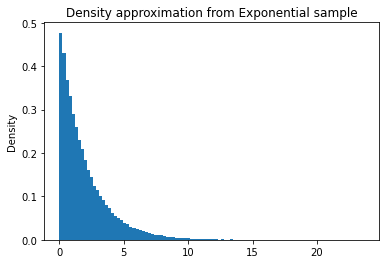

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.hist(myexponentialsample, bins=100, density = True)
ax.set_title("Density approximation from Exponential sample")
ax.set_ylabel("Density")
plt.show()

 ### Exercise 2

1. Implement the inverse transform method yourself in Python for generating a sample from the exponential distribution with mean 5. To do this, use a method from numpy.random (see above!) to obtain a sample from the Uniform distribution. 

2. Produce a plot that shows two histograms next to each other: 
	The first histogram shows a sample from the exponential distribution using your inverse transform method. 
	The second histogram shows a sample from the exponential distribution using a suitable method from numpy.random (that you have used in the Exercise 1.3). 

### Solution to Exercise 2

We first create a sample from the exponential distribution with mean 5 using rng.exponential. 

In [12]:
myexponentialsample1 = rng.exponential(scale=5.0, size=sample_size)
print("Sample mean of first sample is ", np.mean(myexponentialsample1))
print("The sample variance is ", np.var(myexponentialsample1, ddof=1))

Sample mean of first sample is  4.996193474323005
The sample variance is  24.782139745611456


Next, we write our own function that implements the inverse transform method for generating a sample from the exponential distribution.  

Recall that the cdf of an exponential distribution with mean $\nu$ is given by 
$$
F(x)=1-e^{-\frac{1}{\nu} x}, \quad x\ge 0,
$$
whose inverse is given by $F^{-1}(x)=-\nu \ln (1-x)$. Observe further that $X\sim U(0,1)$, if and only if $1-X\sim U(0,1)$.

In [13]:
# Sampling from the exponential distribution with mean myscale using own inverse transformation.
def myexponential(rng, myscale=1.0, samplesize=100000):
    myuniforms = rng.random(size=samplesize)
    mu = 1.0/myscale
    exponentials = - np.log(myuniforms)/mu
    return exponentials

In [14]:
myexponentialsample2 = myexponential(rng, 5.0, sample_size)
print("Sample mean of second sample is ", np.mean(myexponentialsample2))
print("The sample variance is ", np.var(myexponentialsample2, ddof=1))

Sample mean of second sample is  4.964882259582785
The sample variance is  24.554045740319772


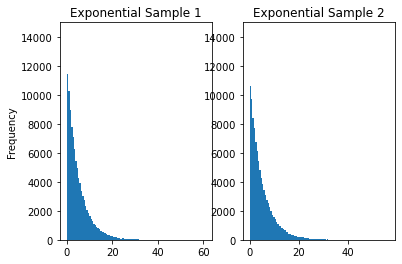

In [15]:
# Plotting the two exponentially distributed samples
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.hist(myexponentialsample1, bins=100)
ax1.set_title("Exponential Sample 1")
ax1.set_ylabel("Frequency")
ax1.set_ylim((0, 15000))
ax2.hist(myexponentialsample2, bins=100)
ax2.set_title("Exponential Sample 2")
ax2.set_ylim((0, 15000))
plt.show()

### Exercise 3
1. Write a function in Python that implements the Von Neumann's acceptance-rejection method for generating a sample from the half-normal distribution with density
$$
f(x)=\sqrt{\frac{2}{\pi}} e^{-\frac{x^2}{2}}1_{x\ge 0}, \quad x\in \mathbb{R}
$$
by sampling from the exponential distribution with density $g(x)=e^{-x}1_{x\ge 0}$ for $x\in \mathbb{R}$. 
2. Then use your function to generate a half-normal distributed sample using Von Neumann's acceptance-rejection method and plot it in a histogram. 
3. Use Python code to work out the proportion of numbers that you reject when generating your sample. Check that this is consistent with the corresponding theoretical result derived in the lecture notes!   
4. Enhancing the efficiency of the  Acceptance-Rejection method via vectorisation technique, and using negative binomial distribution to determine the total number of trials.


### Solution to Exercise 3

In [45]:
# Choose sample size
sample_size = 100000

In [46]:
def f(x):
    result = np.exp(-0.5*x**2)*np.sqrt(2.0/math.pi)*(x>=0)  # pdf half normal
    return result

In [47]:
def g(x):
    result = np.exp(-x)*(x>=0)  # pdf exponential
    return result

In [48]:
def acceptance_rejection(rng, samplesize=1000):
    mysample = np.zeros(samplesize)
    # Number of trials until and including the first success (acceptance)
    numberoftrials = np.ones(samplesize)
    accepted = False
    c = np.sqrt(2.0*np.exp(1.0)/math.pi)
    for i in range(samplesize):
        while not accepted:
            myexponential = rng.exponential(scale=1.0, size=1) 
            myratio = f(myexponential)/(g(myexponential)*c)
            myuniform = rng.random(size=1)
            if myuniform <= myratio:
                accepted = True
            else:
                numberoftrials[i] += 1
        mysample[i] = myexponential
        accepted = False
    return mysample, numberoftrials

In [49]:
(myhalfnormalsample1, trials) = acceptance_rejection(rng, sample_size)

In [50]:
# Compute specific constant c 
constant_c = np.sqrt(2.0*np.exp(1.0)/math.pi)

In [51]:
# Compute proportion of rejected numbers based on sample
proprej = (np.sum(trials)-sample_size)/np.sum(trials)

In [52]:
print("Proportion of rejected numbers based on sample: ", proprej)

Proportion of rejected numbers based on sample:  0.2393470555124519


In [53]:
print("Theoretical result is 1 - 1/c = ", 1.0 - 1.0/constant_c)

Theoretical result is 1 - 1/c =  0.23982654946685966


In [54]:
# Generating a half-normal distribution sample using rng.standard_normal
myhalfnormalsample2 = np.abs(rng.standard_normal(sample_size))

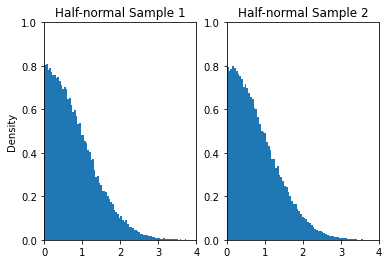

In [55]:
# Plotting the two half-normal distributed samples
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.hist(myhalfnormalsample1, bins=100, density = True)
ax1.set_title("Half-normal Sample 1")
ax1.set_ylabel("Density")
ax1.set_ylim((0, 1))
ax1.set_xlim((0, 4))
ax2.hist(myhalfnormalsample2, bins=100, density = True)
ax2.set_title("Half-normal Sample 2")
ax2.set_ylim((0, 1))
ax2.set_xlim((0, 4))
plt.show()

The previous implementation of the acceptance-rejection algorithm builds up the array dynamically in a loop, which is very inefficient. Below we present a vectorization of the algorithm.


In [56]:
def acceptance_rejection_vectorize(rng, trialsize):
    
    c = np.sqrt(2.0*np.exp(1.0)/math.pi)

    myexponential = rng.exponential(scale=1.0, size=trialsize)
    myratio = f(myexponential)/(g(myexponential)*c)
    myuniform = rng.random(size=trialsize)
    accepted = (myuniform <=  myratio)
    
    
    return myexponential[accepted] 

In [57]:
myhalfnormalsample = acceptance_rejection_vectorize(rng, sample_size)
print("The number of trials: ", sample_size)
print("The accepted sample size:", len(myhalfnormalsample))


The number of trials:  100000
The accepted sample size: 75872


The number of trails can be determined based on percentiles of negative bionomial distribution. 

Recall that for each trial,  a sample $X$ generated from $g$ has the acceptance probability  $1/c$. Hence the event "accept or reject a sample" is a Bernoulli random variable with the probability of "success" equal to $p=1/c$. 
Then the acceptance-rejection procedure can be viewed as a sequenence of independent Bernoulli trials, and each trial has the probability of success  $p$ and of failure  $(1 − p)$. Thus, the number of failures  before $r$ successes follows from the negative binomial distribution  $X\sim NB(r,p)$.

Therefore, for a given target sample size $M$,  let $F$ be $99.9\%$ percentile of $X\sim NB(M,p)$, i.e., 
$\mathbb{P}(X\le F)=0.999$. Then it holds with probability $99.9\%$ that, the acceptance-rejection algorithm with $M+F$ trials outputs $M$ samples.

The vectorized version performs 132181 trials.
The vectorized version generates 100443 samples in 0.007936954498291016 seconds.
The while-loop version generates 100000 samples in 2.7976651191711426 seconds.


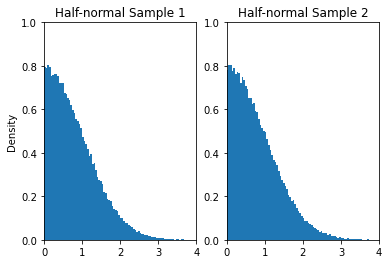

In [59]:
import time
from scipy.stats import nbinom

sample_size = 100000

start = time.time()

# generate half-normal samples using vectorized version
constant_c = np.sqrt(2.0*np.exp(1.0)/math.pi)
accept_prob = 1/constant_c
numberoftrials = int(nbinom.ppf(0.999, sample_size, accept_prob))+sample_size

print("The vectorized version performs {} trials.".format(numberoftrials))


myhalfnormalsample1 = acceptance_rejection_vectorize(rng, numberoftrials)
output_size = len(myhalfnormalsample1)


ARvectorized_endtime = time.time()

print("The vectorized version generates {} samples in {} seconds.".format(output_size, ARvectorized_endtime-start ))

# generate half-normal samples using while-loop version

(myhalfnormalsample2, trials) = acceptance_rejection(rng, sample_size)

ARloop_endtime = time.time()

print("The while-loop version generates {} samples in {} seconds.".format(sample_size, ARloop_endtime- ARvectorized_endtime))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.hist(myhalfnormalsample1, bins=100, density = True)
ax1.set_title("Half-normal Sample 1")
ax1.set_ylabel("Density")
ax1.set_ylim((0, 1))
ax1.set_xlim((0, 4))
ax2.hist(myhalfnormalsample2, bins=100, density = True)
ax2.set_title("Half-normal Sample 2")
ax2.set_ylim((0, 1))
ax2.set_xlim((0, 4))
plt.show()
